# Introduction

Welcome to my NLP project to recognize sarcasm !

# Import of datas

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_json("data/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [3]:
df.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [4]:
del df['article_link'] #We won't use the link for our model

In [5]:
df

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

is_sarcastic
0    14985
1    13634
Name: count, dtype: int64


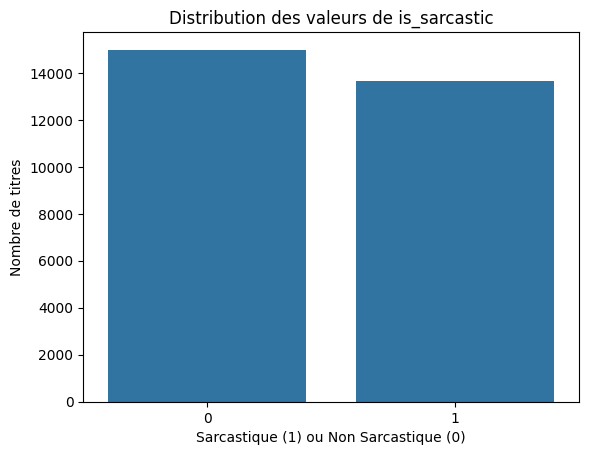

In [7]:
# Calculer la distribution
distribution = df['is_sarcastic'].value_counts()

# Afficher la distribution
print(distribution)

# Visualiser la distribution
sns.countplot(x='is_sarcastic', data=df)
plt.title('Distribution des valeurs de is_sarcastic')
plt.xlabel('Sarcastique (1) ou Non Sarcastique (0)')
plt.ylabel('Nombre de titres')
plt.show()

The dataset is balanced

I want to remove stop words and punctuation

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def remove_stop_words_and_punctuation(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word not in punctuation]
    return ' '.join(filtered_words)

# Appliquer la fonction à la colonne 'headline'
df['cleaned_headline'] = df['headline'].apply(remove_stop_words_and_punctuation)

# Afficher quelques exemples
print(df[['headline', 'cleaned_headline']].head())

                                            headline  \
0  thirtysomething scientists unveil doomsday clo...   
1  dem rep. totally nails why congress is falling...   
2  eat your veggies: 9 deliciously different recipes   
3  inclement weather prevents liar from getting t...   
4  mother comes pretty close to using word 'strea...   

                                    cleaned_headline  
0  thirtysomething scientists unveil doomsday clo...  
1  dem rep. totally nails congress falling short ...  
2        eat veggies 9 deliciously different recipes  
3       inclement weather prevents liar getting work  
4  mother comes pretty close using word 'streamin...  


In [10]:
df

,is_sarcastic,headline,cleaned_headline
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,dem rep. totally nails congress falling short ...
2,0,eat your veggies: 9 deliciously different recipes,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,mother comes pretty close using word 'streamin...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,jews celebrate rosh hashasha something
28615,1,internal affairs investigator disappointed con...,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...,beautiful acceptance speech week came queer ko...
28617,1,mars probe destroyed by orbiting spielberg-gat...,mars probe destroyed orbiting spielberg-gates ...


In [11]:
from wordcloud import WordCloud

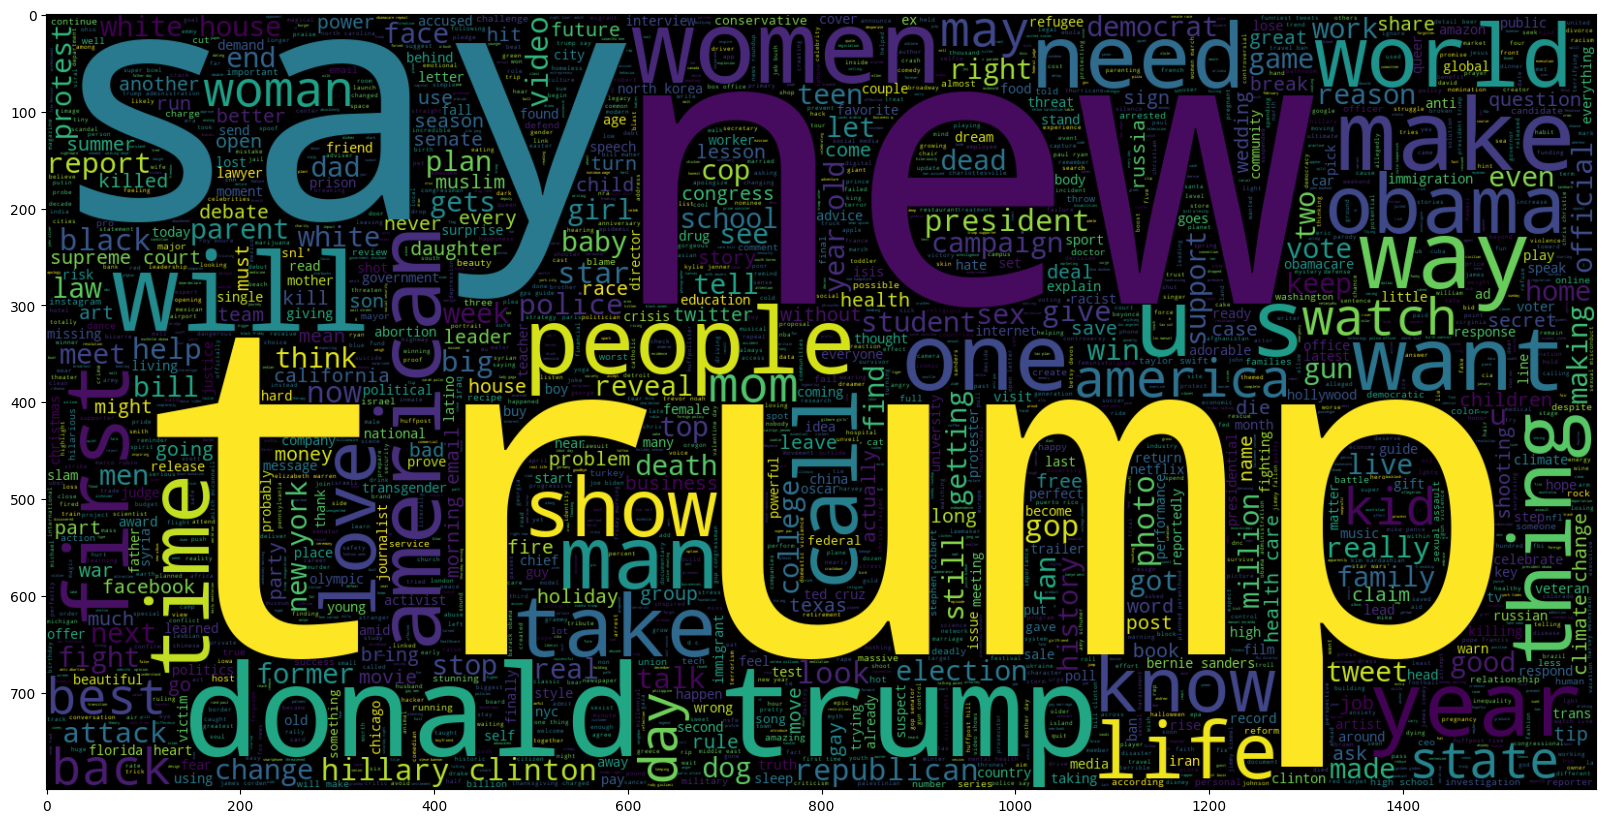

In [12]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

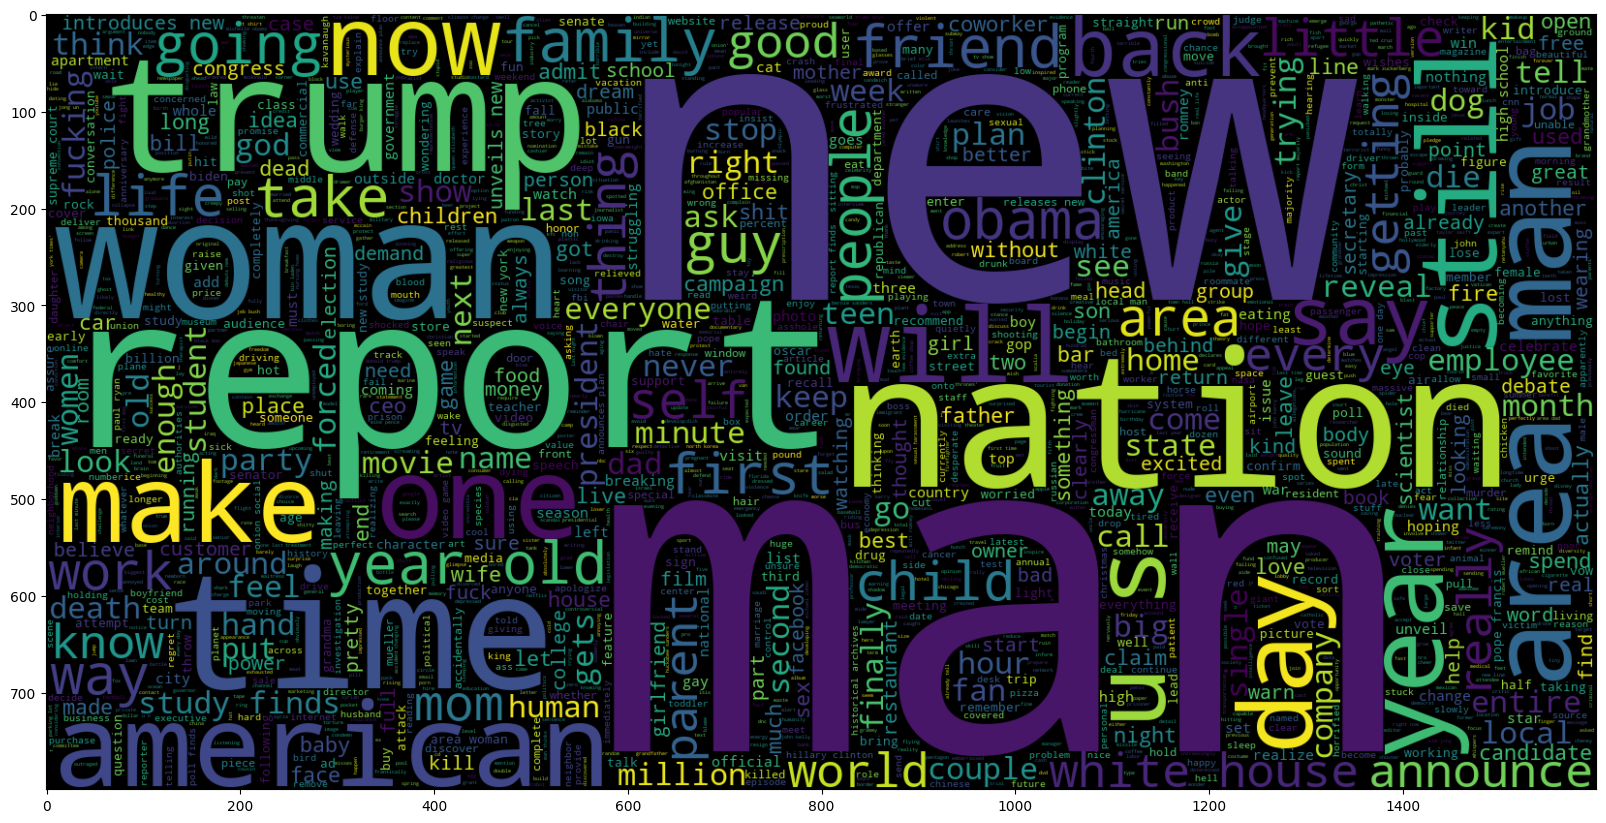

In [13]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

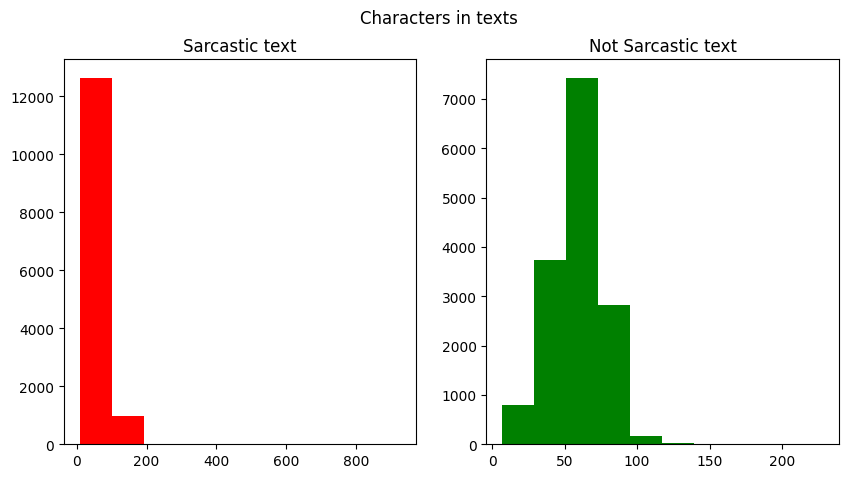

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts')
plt.show()

Sarcastic headline are shorter

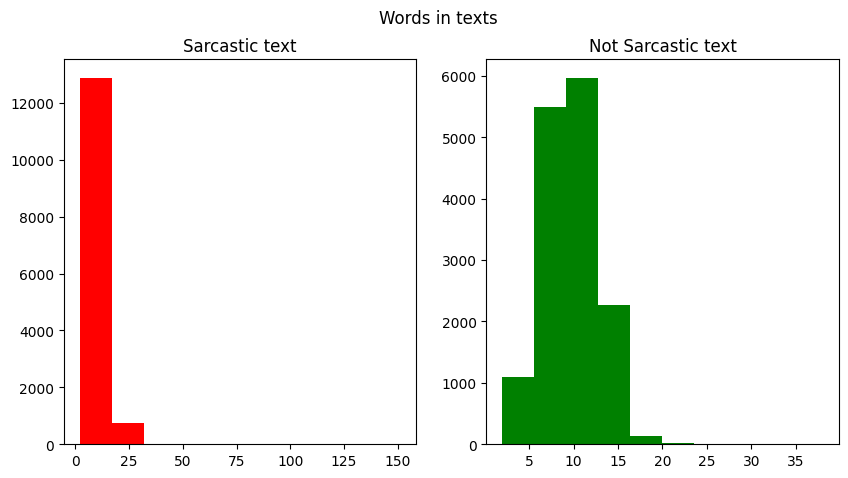

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Words in texts')
plt.show()

c:\Users\anton\OneDrive\Documents\GitHub\Deep_learning\Sarcasm_recognition\.venv\lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\anton\OneDrive\Documents\GitHub\Deep_learning\Sarcasm_recognition\.venv\lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Average word length in each text')

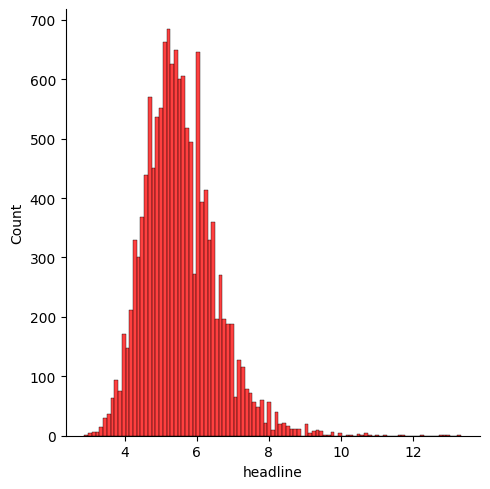

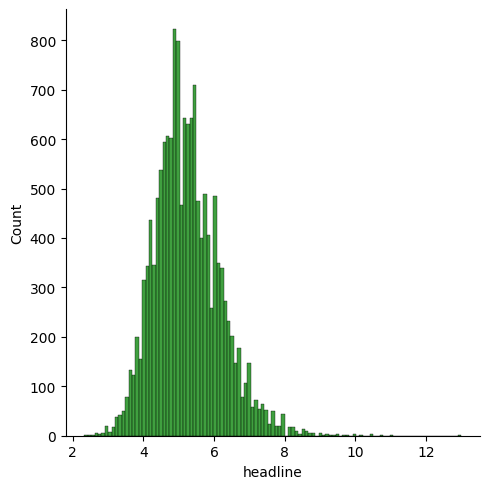

In [16]:
word=df[df['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.displot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Sarcastic text')
word=df[df['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.displot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Average word length in each text')

In [17]:
words = []
for i in df.cleaned_headline.values:
    words.append(i.split())
words[:5]

[['thirtysomething',
  'scientists',
  'unveil',
  'doomsday',
  'clock',
  'hair',
  'loss'],
 ['dem',
  'rep.',
  'totally',
  'nails',
  'congress',
  'falling',
  'short',
  'gender',
  'racial',
  'equality'],
 ['eat', 'veggies', '9', 'deliciously', 'different', 'recipes'],
 ['inclement', 'weather', 'prevents', 'liar', 'getting', 'work'],
 ['mother',
  'comes',
  'pretty',
  'close',
  'using',
  'word',
  "'streaming",
  'correctly']]

In [18]:
import gensim
#Dimension of vectors we are generating
EMBEDDING_DIM = 200

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words , vector_size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [19]:
#vocab size
len(w2v_model.wv.key_to_index)
#We have now represented each of 38071 words by a 100dim vector.

30433

In [20]:
import keras

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
tokenizer = Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = pad_sequences(tokenized_train, maxlen = 20)

In [23]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [24]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense, Dropout

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=32 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 0.001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

In [ ]:
del embedding_vectors

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, df.is_sarcastic , test_size = 0.3 , random_state = 0) 

In [ ]:
history = model.fit(x_train, y_train, batch_size = 32 , validation_data = (x_test,y_test) , epochs = 3)

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

The model overfit